In [1]:
import xarray as xr

In [19]:
ds = xr.open_dataset("landsat_hires.nc")

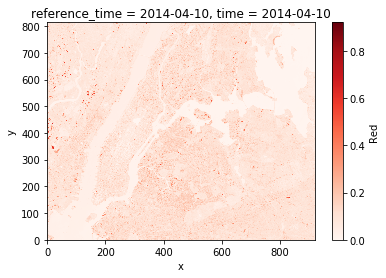

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
ds['Red'][0].plot(cmap='Reds')